In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize

In [3]:
#analytic profile of the core

def an_prof(r, rc, m22):
    rho = ((1.9*10**7) / (rc**4))/(m22**2)
    term = (1 + 0.091*(r/rc)**2)**-8
    return rho * term

In [4]:
# calculates the spherical shell mass at a given point
def enclosed_mass(r, dens):
    V = 4*np.pi*r**2
    return V*dens

(0.001, 10)

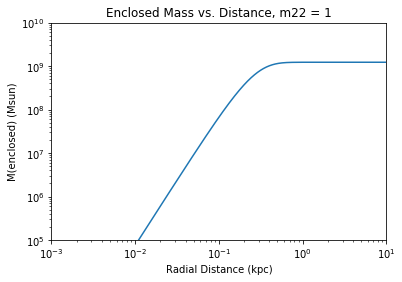

In [5]:
r = np.linspace(0, 15, 1000000)
dr = 15 / 1000000
m22 = 1
dens = an_prof(r, 0.18, m22)
m = enclosed_mass(r,dens)*dr
sum = 0
menc = np.zeros(1000000)
for i in range(1, 1000000):
    menc[i] = sum
    sum = sum + m[i]
plt.plot(r, menc)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance, m22 = ' + str(m22))
plt.ylim(10**(5), 10**(10))
plt.xlim(10**(-3), 10**(1))


In [6]:
from scipy.integrate import quad

In [7]:
#analytic profile of the core

def an_prof2(r, rc, m22):
    rho = ((1.9*10**7) / (rc**4))/(m22**2)
    term = (1 + 0.091*(r/rc)**2)**-8
    return rho * term * 4*np.pi*(r**2)

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


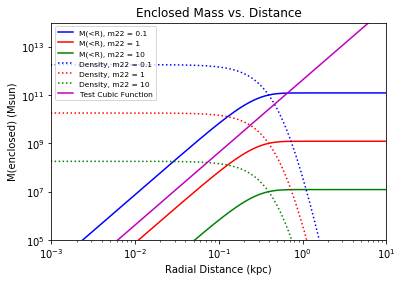

In [21]:
def plotter(upper_bound,rc,m22, c):
    r = np.linspace(0, upper_bound, 10000)
    m_enc = np.zeros(10000)
    for i in range(1, 10000):
        I = quad(an_prof2, 0, r[i], args=(rc,m22))
        m_enc[i] = I[0]
    plt.plot(r, m_enc, c)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance')
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(1))

def an_plotter(upper_bound, rc, m22, c):
    r = np.linspace(0, upper_bound, 10000)
    plt.plot(r, an_prof(r, rc, m22), c)
    
#testing
plotter(15, 0.18, 0.1, 'b')
plotter(15, 0.18, 1, 'r')
plotter(15, 0.18, 10, 'g')

an_plotter(15, 0.18, 0.1, 'b:')
an_plotter(15, 0.18, 1, 'r:')
an_plotter(15, 0.18, 10, 'g:')

test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'm')


plt.legend(['M(<R), m22 = 0.1','M(<R), m22 = 1', 'M(<R), m22 = 10', 'Density, m22 = 0.1', 'Density, m22 = 1', 'Density, m22 = 10', 'Test Cubic Function'],  prop={"size":7.5})

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/analytic_profiles.png')

In [22]:
def mass_profile_file(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    rc = np.array(hf['rc'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(1, len(m_enc)):
        sum = sum + dens_sphere[i]*(dist[i] - dist[i-1])
        m_enc[i] = sum
    return dist, m_enc

In [39]:
def radial_plotter(file_path):
    test = mass_profile_file(file_path)
    plt.scatter(test[0], test[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance')
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-5), 10**(1))
    
    del_x = np.log10(test[0][6]) - np.log10(test[0][1])
    del_y = np.log10(test[1][6]) - np.log10(test[1][1])
    slope = del_y/del_x
    plt.legend(['Core Slope = ' + str(slope)])

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


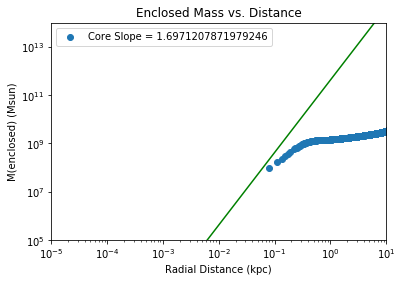

In [40]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/fInf.png')
plt.show()




/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


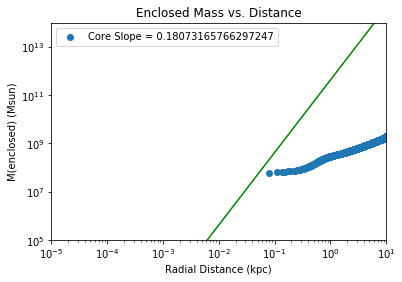

In [41]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f1.png')
plt.show()

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


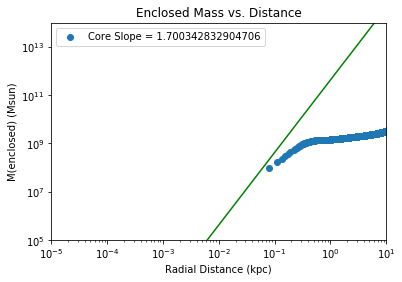

In [42]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f4.png')
plt.show()

/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.launch_new_instance()
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


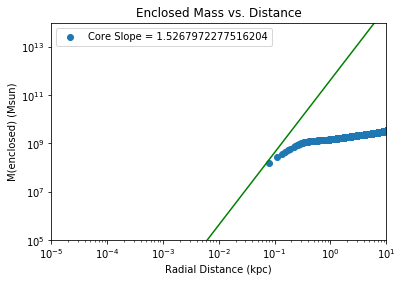

In [43]:
#testing
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0170.h5'
radial_plotter(pathInf)
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
#radial_plotter(path4, 'g--')
#radial_plotter(path1, 'b--')

test_r = np.linspace(0, 15, 10000)
cubic = (4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r256/f1.5.png')
plt.show()

/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


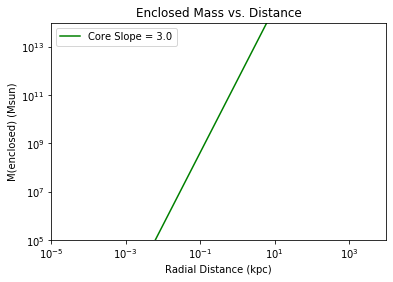

In [44]:
test_r = np.linspace(0, 1000, 1000000)
cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
plt.plot(test_r,cubic, 'g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Enclosed Mass vs. Distance')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-5), 10**(4))
del_x = np.log10(test_r[800000]) - np.log10(test_r[200000])
del_y = np.log10(cubic[800000])- np.log10(cubic[200000])
slope = del_y/del_x
plt.legend(['Core Slope = ' + str(slope)])

plt.show()

